In [638]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.preprocessing import OneHotEncoder
from test import *

In [1679]:
#now we do it for football.csv file
df = pd.read_csv('./titatnic.csv')
df=df.drop('Passengerid',axis=1)
df=df.dropna(axis=0)
df.corr()
y = df.pop('2urvived').to_numpy()
df=df.drop(['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'],axis=1)
X = df.to_numpy() 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X_train.reshape(X_train.shape[1],X_train.shape[0])
X_test=X_test.reshape(X_test.shape[1],X_test.shape[0])

In [1639]:
def sigmoid(z):
        return 1 / (1 + np.exp(-z))

In [1640]:
layer_sizes=[7,4,3,1]
weights=[]
biases=[]
for i in range(1, len(layer_sizes)):
    weights.append(np.random.rand(layer_sizes[i], layer_sizes[i-1]))  # Weights for each layer
    biases.append(np.zeros(shape=(layer_sizes[i],1))) 

In [1641]:
weights[0].T.shape,weights[1].T.shape,weights[2].T.shape

((7, 4), (4, 3), (3, 1))

In [1642]:
layers=3
weights = []
biases = []
for i in range(1, len(layer_sizes)):
    weights.append(np.random.rand(layer_sizes[i], layer_sizes[i-1]))  # Weights for each layer
    biases.append(np.zeros(shape=(layer_sizes[i],1))) 
z = [0] * layers
a = [0] * layers

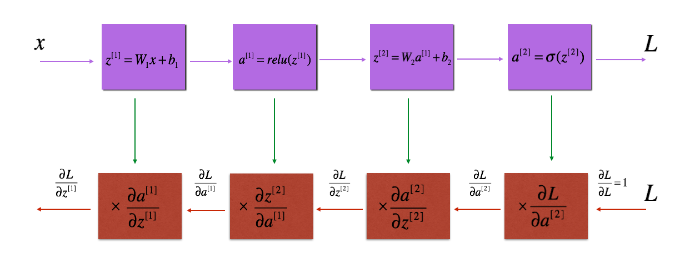

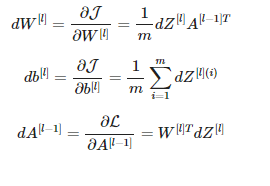

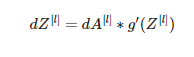

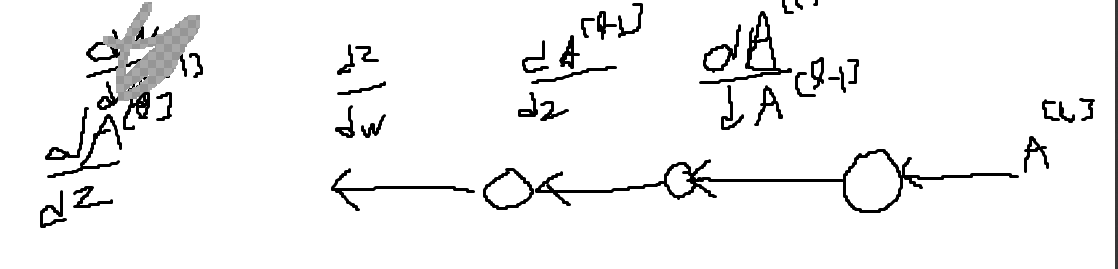

In [1683]:
class NeuralNet:
    def __init__(self,layer_sizes, learning_rate,alpha=0.01):
        self.layers=len(layer_sizes)-1
        self.weights = []
        self.biases = []
        # for i in range(1,self.layers+1):
        #     self.weights.append(np.random.rand(layer_sizes[i], layer_sizes[i-1]))  # Weights for each layer
        #     self.biases.append(np.zeros(shape=(layer_sizes[i],1))) 
        for i in range(1, self.layers + 1):
            # Xavier initialization: weights are initialized with a variance of 2 / (n_in + n_out)
            n_in, n_out = layer_sizes[i - 1], layer_sizes[i]
            xavier_stddev = np.sqrt(2.0 / (n_in + n_out))
            self.weights.append(np.random.randn(n_out, n_in) * xavier_stddev)  # Normal distribution
            self.biases.append(np.zeros((n_out, 1)))

        self.learning_rate = learning_rate
        #z and a start from layer 1 to self.layers
        self.z = [0] * self.layers
        self.a = [0] * self.layers
        #print(a)
        self.alpha=alpha
    def forward(self,X):
        for i in range(self.layers):
            #print(i)
            if i==0:
                #print(self.weights[i].shape,X.shape,self.biases[i].shape)
                self.z[i],self.a[i]=self.linear_forward(X,self.weights[i],self.biases[i],'relu')
            elif i==self.layers-1:
                self.z[i],self.a[i]=self.linear_forward(self.a[i-1],self.weights[i],self.biases[i],'sigmoid')
                #self.a[i]=self.z[i]
            else:
                self.z[i],self.a[i]=self.linear_forward(self.a[i-1],self.weights[i],self.biases[i],'relu')
            #if i!=0:
                #print(self.weights[i].shape,self.a[i-1].shape,self.biases[i].shape)
            #print(self.z[i].shape)
        return self.a[-1]
    def backward_propogate(self,Y,X):
        
        gradA=[0]*self.layers
        gradb=[0]*self.layers
        gradW=[0]*self.layers
        layers=self.layers
        Y=Y.reshape(self.a[-1].shape)
        epsilon = 1e-8
        dJA = (np.divide(1 - Y, 1 - self.a[-1] + epsilon)-(np.divide(Y, self.a[-1] + epsilon)) )
        layers-=1
       # print(dJA)
        # y - 1/yhat - 1-y/1-yhat
        ##print(dJA.shape,self.a[self.layers-1].shape)
        #print(layers)
       # print(gradA)
        gradA[layers-1], gradW[layers], gradb[layers] = self.linear_backward(dJA=dJA, Z=self.z[layers],A_prev=self.a[layers-1],W=self.weights[layers],b=self.biases[layers],activation='sigmoid')
        #print(gradA[layers-1])
        for l in reversed(range(layers)):
            #print(l)
            if l==0:
                dA_prev_temp, dW_temp, db_temp = self.linear_backward(gradA[l],self.z[l],X,self.weights[l],self.biases[l] , activation = "relu")
            else:
                dA_prev_temp, dW_temp, db_temp = self.linear_backward(gradA[l],self.z[l],self.a[l-1],self.weights[l],self.biases[l] , activation = "relu")
            #print(gradA[l-1])
            gradA[l-1] = dA_prev_temp
            gradW[l] = dW_temp
            gradb[l] = db_temp
        #print(gradA)
        #gradW = self.clip_gradients(gradW, 1.0)
        #gradb = self.clip_gradients(gradb, 1.0)
        return gradW,gradb
    
    def clip_gradients(self, grads,clip_value):
        clipped_grads = []
        for grad in grads:
            clipped_grads.append(np.clip(grad, -clip_value, clip_value))
        return clipped_grads

    def optimize(self, gradW, gradb):
        # Clip gradients
        #print(self.layers)
        # Update weights and biases with clipped gradients
        for l in range(self.layers):
            #print(l)
            self.weights[l] -= self.learning_rate * gradW[l]
            self.biases[l] -= self.learning_rate * gradb[l]

        return self.weights, self.biases
    
    def predict(self,X):
        a=self.a.copy()
        z=self.z.copy()
        weights=self.weights.copy()
        biases=self.biases.copy()
        for i in range(self.layers):
            #print(weights[i].shape,X.shape,biases[i].shape)
            if i==0:
                z[i],a[i]=self.linear_forward(X,weights[i],biases[i],'relu')
            elif i==self.layers-1:
                z[i],a[i]=self.linear_forward(a[i-1],weights[i],biases[i],'sigmoid')
            else:
                z[i],a[i]=self.linear_forward(a[i-1],weights[i],biases[i],'relu')
            #print(weights[i].shape,a[i-1].shape,biases[i].shape)
        return a[-1]
    def linear_backward(self,dJA,Z,A_prev,W,b, activation):
        m=A_prev.shape[1]
        #dJ/dZ = dJ/dA * dA/dZ
        #print(f"dJA          Z       A_prev      W      b")
       # print(dJA,Z,A_prev,W,b)
        #print(dJA)
        
        if activation == "relu":
            dJZ = np.array(dJA, copy=True)
            #dA/dZ Z>0 =1 else 0
            dJZ[Z <= 0] = 0
        elif activation == "sigmoid":
            s=1/(1+np.exp(-Z))
            dAZ=s*(1-s)
            dJZ = dJA*dAZ
        elif activation == "leaky_relu":
            dJZ = dJA * self.leaky_relu_derivative(Z, self.alpha)
        elif activation=='':
            dJZ=dJA
        #print(dJZ.shape,dJA.shape)
        #Z= WA+B
        #dZ/dW = A
        #dJ/dW=dZ/dW * dL/dZ
        #1/m to stabalize
        #print(dJZ.shape,A_prev.T.shape)
        dJW=(1/m) * np.dot(dJZ, A_prev.T)
        #print("dJW = dJZ * A[l-1]")
        #print(f"{dJW.shape}= {dJZ.shape}*{A_prev.T.shape}")
        #print(f"W = {W.shape}")
        #dZ/db = 1
        #dJ/db=dJ/dZ *dZ/db
        dJb = (1/m)*np.sum(dJZ,axis=1,keepdims=True)
        #print("dJb = dJZ*1")
        #print(f"{dJW.shape}= {dJZ.shape}")        
        #dZ/dA =W
        #dJ/dA = dJ/dZ *dZ/dA
        dJA = np.dot(W.T,dJZ)
        #print("dJA = dZ/dA* dJ/dZ")
        #print(f"{dJA.shape}= {W.T.shape}*{dJZ.shape}")        
        ##print(dJb.shape,b.shape)
        assert (dJA.shape == A_prev.shape)
        assert (dJW.shape == W.shape)
        assert (dJb.shape == b.shape)

        return dJA, dJW, dJb 

    def linear_forward(self,A, W, b,activation=''):
        #A -- activations from previous layer (or input data): (size of previous layer, number of examples)
        #W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
        #b -- bias vector, numpy array of shape (size of the current layer, 1)
        ##print(W.shape,A.shape,b.shape)
        Z=np.dot(W,A)+b
        #7,1045
        #1045,1
        #7,1
        ##print(Z.shape)
        n=A
        assert(Z.shape == (W.shape[0], A.shape[1]))
        if activation=='sigmoid':
            n=self.sigmoid(Z)
            #print(n)
        elif activation=='relu':
            n=self.relu(Z)
        elif activation == 'leaky_relu':
            n=self.leaky_relu(Z, self.alpha)
        return Z, n

    def Cost(self, yhat, Y):
        epsilon = 1e-8  # to avoid division by zero or log(0)
        Y=Y.flatten()
        yhat=yhat.flatten()
        m=len(Y)
        cost = (-1/m) * (np.dot(Y, np.log(yhat+epsilon).T) + np.dot((1-Y), np.log(1-yhat+epsilon).T))
        return cost
    @staticmethod
    def sigmoid_derivation(a):
        return a*(1-a)

    @staticmethod
    def leaky_relu(z, alpha=0.01):
        return np.where(z > 0, z, alpha * z)
    @staticmethod
    def leaky_relu_derivative(z, alpha=0.01):
        return np.where(z > 0, 1, alpha)

    @staticmethod
    def relu(z):
        return np.maximum(0,z)
    
    @staticmethod
    def sigmoid(z):
        return np.divide(1,(1 + np.exp(-z)))

In [1715]:
nn=NeuralNet(layer_sizes=[X_train.shape[0],4,4,2,1],learning_rate=0.01)

In [1718]:
steps=20000
for i in range(steps):
    nn.forward(X_train)
    gradsW,gradsb=nn.backward_propogate(y_train,X_train)
    mean_gradsW = [np.mean(gw) for gw in gradsW]
    mean_gradsb = [np.mean(gb) for gb in gradsb]
    #print(f"Step {i+1}, Mean Gradients Weights: {mean_gradsW}, Mean Gradients Biases: {mean_gradsb}")
    #print(f"Step {i+1},  Weights: {nn.weights},  Biases: {nn.biases}")
    nn.optimize(gradsW,gradsb)
    #print(nn.a[-1].shape)
    y_pred=nn.predict(X_test).flatten()
    #print(y_pred.shape,y_test.shape)
    #print(f"Test = {nn.Cost(y_pred,y_test)}")
    print(nn.Cost(nn.a[-1].flatten(),y_train),nn.Cost(y_pred,y_test))

0.5703393433810091 0.581357381730083
0.5703392336349961 0.5813576098641471
0.5703391241580673 0.5813578378769043
0.5703390146335287 0.5813580639314149
0.5703389051143882 0.5813582919810932
0.570338795611057 0.5813585180717856
0.5703386860481887 0.5813587441825171
0.5703385765422603 0.5813589722896753
0.5703384669739544 0.5813591984368416
0.5703383574126364 0.5813594265813533
0.5703382478652468 0.5813596527651317
0.5703381382658834 0.581359856555392
0.5703380293288822 0.5813601141183601
0.5703379191560192 0.5813603403586122
0.57033780958911 0.5813605461746106
0.5703377002722819 0.5813608018249439
0.5703375903942968 0.5813610056916455
0.5703374808423691 0.581361236141705
0.5703373711606794 0.5813614625091673
0.5703372615170791 0.5813616908781778
0.5703371518789947 0.5813619172828209
0.5703370421861809 0.5813621437080058
0.5703369325572333 0.5813623721359912
0.5703368228526561 0.5813625985985976
0.5703367131691336 0.5813628270649195
0.5703366034985055 0.5813630808261124
0.5703364940900109

In [1644]:
n=NeuralNet([1,1,1,1],0.1)
A_prev, W, b = linear_activation_forward_test_case()

Z, A = n.linear_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

Z, A = n.linear_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))
X, parameters = L_model_forward_test_case_2hidden()
w=[]
b=[]
for l in range(3):
    w.append(parameters['W'+str(l+1)])
    b.append(parameters['b'+str(l+1)])
n=NeuralNet([1,1,1,1],0.1)
n.weights=w
n.biases=b
AL = n.forward(X)
print("AL = " + str(AL))
Y, AL = compute_cost_test_case()

print("cost = " + str(n.Cost(AL, Y)))

dJZ, linear_cache = linear_backward_test_case()
m=linear_cache[0].shape[1]
dJW=(1/m) * np.dot(dJZ, linear_cache[0].T)
#print("dJW = dJZ * A[l-1]")
#print(f"{dJW.shape}= {dJZ.shape}*{A_prev.T.shape}")
#print(f"W = {W.shape}")
#dZ/db = 1
#dJ/db=dJ/dZ *dZ/db
dJb = (1/m)*np.sum(dJZ,axis=1,keepdims=True)
#print("dJb = dJZ*1")
#print(f"{dJW.shape}= {dJZ.shape}")        
#dZ/dA =W
#dJ/dA = dJ/dZ *dZ/dA
dJA = np.dot(linear_cache[1].T,dJZ)
print ("dA_prev = "+ str(dJA))
print ("dW = " + str(dJW))
print ("db = " + str(dJb))
dAL, cache = linear_activation_backward_test_case()
linear_cache, activation_cache = cache
dA_prev, dW, db = n.linear_backward(dAL,activation_cache, linear_cache[0],linear_cache[1],linear_cache[2], activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = n.linear_backward(dAL, activation_cache,linear_cache[0],linear_cache[1],linear_cache[2], activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))
AL, Y_assess, caches = L_model_backward_test_case()
m = AL.shape[1]
Y = Y_assess.reshape(AL.shape)
L=len(caches)
gradA=[0]*L
gradb=[0]*L
gradW=[0]*L
L-=1
#print(gradA)
#print(gradA)
#Y=Y.reshape(n.a[-1].shape)
epsilon = 1e-8
dJA = (np.divide(1 - Y, 1 - AL)-(np.divide(Y, AL)) )
# y - 1/yhat - 1-y/1-yhat
##print(dJA.shape,n.a[n.L-1].shape)
#print(L-1)
current_cache = caches[L]
linear_cache, activation_cache = current_cache
gradA[L-1], gradW[L], gradb[L] = n.linear_backward(dJA, activation_cache,linear_cache[0],linear_cache[1],linear_cache[2], activation = "sigmoid")
##print(gradA[1].shape)
for l in reversed(range(L)):
    #print(l)
    current_cache = caches[l]
    linear_cache, activation_cache = current_cache
    dA_prev_temp, dW_temp, db_temp = n.linear_backward(gradA[l], activation_cache,linear_cache[0],linear_cache[1],linear_cache[2], activation = "relu")
    gradA[l+1] = dA_prev_temp
    gradW[l] = dW_temp
    gradb[l] = db_temp
#gradA,gradW,gradb

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]
AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
cost = 0.2797765501534163
dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]
(1, 2) (2, 3)
sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

(1, 2) (2, 3)
relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418

In [1645]:
nn=NeuralNet(layer_sizes=[X_train.shape[0],1,1],learning_rate=0.01)

In [1646]:
steps=2
for i in range(steps):
    nn.forward(X_train)
    gradsW,gradsb=nn.backward_propogate(y_train,X_train)
    nn.optimize(gradsW,gradsb)
    pred=nn.predict(X_test)
    mean_gradsW = [np.mean(gw) for gw in gradsW]
    mean_gradsb = [np.mean(gb) for gb in gradsb]
    #print(f"Step {i+1}, Mean Gradients Weights: {mean_gradsW}, Mean Gradients Biases: {mean_gradsb}")
    #print(f"Step {i+1},  Weights: {nn.weights},  Biases: {nn.biases}")
    y_pred = np.where(pred >= 0.5, 1, 0).flatten()
    #print(y_train.shape,y_test.shape)
    #print(accuracy_score(np.where(nn.a[-1]>= 0.5, 1, 0).flatten(),y_train),accuracy_score(y_pred,y_test))

(1, 1045) (1045, 1)
(1, 1045) (1045, 7)
0
1
(1, 1045) (1045, 1)
(1, 1045) (1045, 7)
0
1


In [1670]:
df = pd.read_csv('./house_prices.csv')
df=df.drop("Unnamed: 0",axis=1)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['location']=label_encoder.fit_transform(df['location'])
df['city']=label_encoder.fit_transform(df['city'])
df['purpose']=label_encoder.fit_transform(df['purpose'])
df['property_type']=label_encoder.fit_transform(df['property_type'])
df['Area_in_Marla']=label_encoder.fit_transform(df['Area_in_Marla'])
df=df.drop('location',axis=1)
from sklearn.preprocessing import MinMaxScaler
y=df.pop('price').to_numpy()/10000000
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
X = pd.DataFrame(X, columns=df.columns)
X=X.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X_train.reshape(X_train.shape[1],X_train.shape[0])
X_test=X_test.reshape(X_test.shape[1],X_test.shape[0])


In [1648]:
#now we do it for football.csv file
df = pd.read_csv('football.csv')
df=df.drop('Team',axis=1)
df.corr()
y = df.pop('Points').to_numpy()
X = df.to_numpy() 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train=X_train.reshape(X_train.shape[1],X_train.shape[0])
X_test=X_test.reshape(X_test.shape[1],X_test.shape[0])

In [1672]:
class NeuralNet:
    def __init__(self,layer_sizes, learning_rate,alpha=0.01):
        self.layers=len(layer_sizes)-1
        self.weights = []
        self.biases = []
        # for i in range(1,self.layers+1):
        #     self.weights.append(np.random.rand(layer_sizes[i], layer_sizes[i-1]))  # Weights for each layer
        #     self.biases.append(np.zeros(shape=(layer_sizes[i],1))) 
        for i in range(1, self.layers + 1):
            # Xavier initialization: weights are initialized with a variance of 2 / (n_in + n_out)
            n_in, n_out = layer_sizes[i - 1], layer_sizes[i]
            xavier_stddev = np.sqrt(2.0 / (n_in + n_out))
            self.weights.append(np.random.randn(n_out, n_in) * xavier_stddev)  # Normal distribution
            self.biases.append(np.zeros((n_out, 1)))

        self.learning_rate = learning_rate
        #z and a start from layer 1 to self.layers
        self.z = [0] * self.layers
        self.a = [0] * self.layers
        #print(a)
        self.alpha=alpha
    def forward(self,X):
        for i in range(self.layers):
            #print(i)
            if i==0:
                #print(self.weights[i].shape,X.shape,self.biases[i].shape)
                self.z[i],self.a[i]=self.linear_forward(X,self.weights[i],self.biases[i],'relu')
            elif i==self.layers-1:
                self.z[i],self.a[i]=self.linear_forward(self.a[i-1],self.weights[i],self.biases[i],'')
                #self.a[i]=self.z[i]
            else:
                self.z[i],self.a[i]=self.linear_forward(self.a[i-1],self.weights[i],self.biases[i],'relu')
            #if i!=0:
                #print(self.weights[i].shape,self.a[i-1].shape,self.biases[i].shape)
            #print(self.z[i].shape)
        return self.a[-1]
    def backward_propogate(self,Y,X):
        
        gradA=[0]*self.layers
        gradb=[0]*self.layers
        gradW=[0]*self.layers
        layers=self.layers
        Y=Y.reshape(self.a[-1].shape)
        epsilon = 1e-8
        m=len(Y)
        dJA = (2/m)*np.sum(self.a[-1]-Y,axis=0)
        layers-=1
        #print(gradb)
        # y - 1/yhat - 1-y/1-yhat
        ##print(dJA.shape,self.a[self.layers-1].shape)
        #print(layers)
       # print(gradA)
        gradA[layers-1], gradW[layers], gradb[layers] = self.linear_backward(dJA=dJA, Z=self.z[layers],A_prev=self.a[layers-1],W=self.weights[layers],b=self.biases[layers],activation='')
        #print(layers)
        #print(gradb[layers])
        #print(gradb)
        for l in reversed(range(layers)):
            #print(l)
            if l==0:
                dA_prev_temp, dW_temp, db_temp = self.linear_backward(gradA[l],self.z[l],X,self.weights[l],self.biases[l] , activation = "relu")
            else:
                dA_prev_temp, dW_temp, db_temp = self.linear_backward(gradA[l],self.z[l],self.a[l-1],self.weights[l],self.biases[l] , activation = "relu")
            #print(gradA[l-1])
            gradA[l-1] = dA_prev_temp
            gradW[l] = dW_temp
            gradb[l] = db_temp
            #print(dW_temp)
            #print(gradb)
        #print(gradA)
        #print(gradb)
        #gradW = self.clip_gradients(gradW, 1.0)
        #gradb = self.clip_gradients(gradb, 1.0)
        #print(gradb)
        return gradW,gradb
    
    def clip_gradients(self, grads,clip_value):
        clipped_grads = []
        for grad in grads:
            clipped_grads.append(np.clip(grad, -clip_value, clip_value))
        return clipped_grads

    def optimize(self, gradW, gradb):
        # Clip gradients
        #print(self.layers)
        # Update weights and biases with clipped gradients
        for l in range(self.layers):
            self.weights[l] -= self.learning_rate * gradW[l]
            self.biases[l] -= self.learning_rate * gradb[l]

        return self.weights, self.biases
    
    def predict(self,X):
        a=self.a.copy()
        z=self.z.copy()
        weights=self.weights.copy()
        biases=self.biases.copy()
        for i in range(self.layers):
            #print(weights[i].shape,X.shape,biases[i].shape)
            if i==0:
                z[i],a[i]=self.linear_forward(X,weights[i],biases[i],'relu')
            elif i==self.layers-1:
                z[i],a[i]=self.linear_forward(a[i-1],weights[i],biases[i],'')
            else:
                z[i],a[i]=self.linear_forward(a[i-1],weights[i],biases[i],'relu')
            #print(weights[i].shape,a[i-1].shape,biases[i].shape)
        return a[-1]
    def linear_backward(self,dJA,Z,A_prev,W,b, activation):
        m=A_prev.shape[1]
        #dJ/dZ = dJ/dA * dA/dZ
        #print(f"dJA          Z       A_prev      W      b")
       # print(dJA,Z,A_prev,W,b)
        #print(dJA)
        if activation == "relu":
            dJZ = np.array(dJA, copy=True)
            #dA/dZ Z>0 =1 else 0
            dJZ[Z <= 0] = 0
        elif activation == "sigmoid":
            s=1/(1+np.exp(-Z))
            dAZ=s*(1-s)
            dJZ = dJA*dAZ
        elif activation == "leaky_relu":
            dJZ = dJA * self.leaky_relu_derivative(Z, self.alpha)
        elif activation=='':
            dJZ=dJA.reshape(1,-1)
        #print(dJZ.shape,dJA.shape)
        #Z= WA+B
        #dZ/dW = A
        #dJ/dW=dZ/dW * dL/dZ
        #1/m to stabalize
        #print(dJZ.shape,A_prev.T.shape)
        dJW=(1/m) * np.dot(dJZ, A_prev.T)
        #print("dJW = dJZ * A[l-1]")
        #print(f"{dJW.shape}= {dJZ.shape}*{A_prev.T.shape}")
        #print(f"W = {W.shape}")
        #dZ/db = 1
        #dJ/db=dJ/dZ *dZ/db
        dJb = (1/m)*np.sum(dJZ,axis=1,keepdims=True)
        #print("dJb = dJZ*1")
        #print(f"{dJW.shape}= {dJZ.shape}")        
        #dZ/dA =W
        #dJ/dA = dJ/dZ *dZ/dA
        dJA = np.dot(W.T,dJZ)
        #print("dJA = dZ/dA* dJ/dZ")
        #print(f"{dJA.shape}= {W.T.shape}*{dJZ.shape}")        
        ##print(dJb.shape,b.shape)
        assert (dJA.shape == A_prev.shape)
        assert (dJW.shape == W.shape)
        assert (dJb.shape == b.shape)

        return dJA, dJW, dJb 

    def linear_forward(self,A, W, b,activation=''):
        #A -- activations from previous layer (or input data): (size of previous layer, number of examples)
        #W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
        #b -- bias vector, numpy array of shape (size of the current layer, 1)
        ##print(W.shape,A.shape,b.shape)
        Z=np.dot(W,A)+b
        #7,1045
        #1045,1
        #7,1
        ##print(Z.shape)
        n=Z
        assert(Z.shape == (W.shape[0], A.shape[1]))
        if activation=='sigmoid':
            n=self.sigmoid(Z)
            #print(n)
        elif activation=='relu':
            n=self.relu(Z)
        elif activation == 'leaky_relu':
            n=self.leaky_relu(Z, self.alpha)
        return Z, n

    def Cost(self, yhat, Y):
        epsilon = 1e-8  # to avoid division by zero or log(0)
        Y=Y.flatten()
        yhat=yhat.flatten()
        m=len(Y)
        cost =np.mean(yhat-Y)
        return cost
    @staticmethod
    def sigmoid_derivation(a):
        return a*(1-a)

    @staticmethod
    def leaky_relu(z, alpha=0.01):
        return np.where(z > 0, z, alpha * z)
    @staticmethod
    def leaky_relu_derivative(z, alpha=0.01):
        return np.where(z > 0, 1, alpha)

    @staticmethod
    def relu(z):
        return np.maximum(0,z)
    
    @staticmethod
    def sigmoid(z):
        return np.divide(1,(1 + np.exp(-z)))

In [1677]:
steps=200
for i in range(steps):
    nn.forward(X_train)
    gradsW,gradsb=nn.backward_propogate(y_train,X_train)
    mean_gradsW = [np.mean(gw) for gw in gradsW]
    mean_gradsb = [np.mean(gb) for gb in gradsb]
    #print(f"Step {i+1}, Mean Gradients Weights: {mean_gradsW}, Mean Gradients Biases: {mean_gradsb}")
    #print(f"Step {i+1},  Weights: {nn.weights},  Biases: {nn.biases}")
    nn.optimize(gradsW,gradsb)
    #print(nn.a[-1].shape)
    y_pred=nn.predict(X_test).flatten()
    #print(y_pred.shape,y_test.shape)
    #print(f"Test = {nn.Cost(y_pred,y_test)}")
    print(nn.Cost(nn.a[-1].flatten(),y_train),nn.Cost(y_pred,y_test))

4.1732423692013385e-05 -0.011616485926880965
4.316857421321371e-05 -0.011614310365134497
4.4566839607942456e-05 -0.011612173416962508
4.5928942992375203e-05 -0.011610047232280579
4.7278335162855074e-05 -0.011607960117056315
4.859128980543031e-05 -0.011605965538992926
4.982074085418298e-05 -0.011604001862535025
5.101965648503391e-05 -0.011602097956731876
5.216221861722299e-05 -0.01160021058867846
5.328987522600345e-05 -0.011598352917619506
5.438896541757473e-05 -0.01159654377889586
5.5441084249097465e-05 -0.011594778264863813
5.645054245810831e-05 -0.011593024265157013
5.744702681911338e-05 -0.01159129301026694
5.842237674335007e-05 -0.011589591505752716
5.936874898351176e-05 -0.011588046631225892
6.017391099892257e-05 -0.011586545607682243
6.0935956977626244e-05 -0.011585072062391484
6.167228847677504e-05 -0.011583619603675412
6.238984179581593e-05 -0.011582178160786003
6.309350765389546e-05 -0.011580746871757587
6.378711427027028e-05 -0.011579341208470604
6.445926727971292e-05 -0.0115

In [1678]:
y_pred*10000000

array([10497161.88477307, 10089320.10956065, 10342744.7723997 , ...,
       10100648.64448526, 10155474.07139035, 10481510.00800837])